In [1]:
print (' ~ ~ ~ ~ ~ ~ ~ ~ OM SHRI GANESHAAYA NAMAHA ~ ~ ~ ~ ~ ~ ~ ~ ')

 ~ ~ ~ ~ ~ ~ ~ ~ OM SHRI GANESHAAYA NAMAHA ~ ~ ~ ~ ~ ~ ~ ~ 


### Problem

<pre> 
    Model the probability that a business goes bankrupt 
    The data set includes the following variables:
      1. industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.
      2. management_risk: 0=low risk, 0.5=medium risk, 1=high risk.
      3. financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
      4. credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
      5. competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.
      6. operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.
      7. class: bankruptcy, non-bankruptcy (target variable).able).

</pre>

### Library imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, hinge_loss
from sklearn.metrics import brier_score_loss, log_loss, matthews_corrcoef

from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

import time as t

import ydata_profiling as yd

import warnings
warnings.filterwarnings(action='ignore')

## <font color='#e74c3c'> Read data </font>

In [3]:
df = pd.read_csv('bankruptcy-prevention.csv')
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


### <font color='#1abc9c'> Change the name of the target column from 'class' (Python keyword) to 'category'. </font>

In [4]:
df.columns = ['industrial_risk', 'management_risk', 'financial_flexibility',
        'credibility', 'competitiveness', 'operating_risk', 'category']
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,category
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


### <font color='#1abc9c'> Maintaining a deep copy of original data </font>

In [5]:
df_orig = df.copy()
id(df), id(df_orig)

(2012012087312, 2011991222416)

## <font color='#e74c3c'> Pandas Profiling Automated EDA </font>

In [6]:
# profile = yd.ProfileReport(df, title="Report")
# profile

## <font color='#e74c3c'> Data Processing and EDA </font>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   category               250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [8]:
print(f'Unique categories: {df.category.unique()}')

Unique categories: ['bankruptcy' 'non-bankruptcy']


#### <font color='#1abc9c'> Convert the target column 'category' into numeric </font>

In [9]:
df['category'] = df['category'].apply(lambda x: 0 if x=='non-bankruptcy' else 1)

In [10]:
print(f'Unique categories: {df.category.unique()}')
df.head()

Unique categories: [1 0]


,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,category
0,0.5,1.0,0.0,0.0,0.0,0.5,1
1,0.0,1.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.5,0.0,0.0,0.5,0.0,1.0,1
4,1.0,1.0,0.0,0.0,0.0,1.0,1


In [11]:
print(df['industrial_risk'].unique())
print(df['management_risk'].unique()) 
print(df['financial_flexibility'].unique())
print(df['credibility'].unique())
print(df['competitiveness'].unique())
print(df['operating_risk'].unique())

[0.5 0.  1. ]
[1.  0.  0.5]
[0.  0.5 1. ]
[0.  0.5 1. ]
[0.  0.5 1. ]
[0.5 1.  0. ]


#### <font color='#1abc9c'> Check for null or NaN values </font>

In [12]:
df.isna().sum(), df.isnull().sum()

(industrial_risk          0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 category                 0
 dtype: int64,
 industrial_risk          0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 category                 0
 dtype: int64)

In [13]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,category
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000,0.428000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575,0.495781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### <font color='#1abc9c'> Check for duplicate values </font>

In [14]:
print(f'Are there any duplicated rows? {df.duplicated().any()}')

Are there any duplicated rows? True


In [15]:
#De-duplicating rows
df.drop_duplicates(subset=None, keep='first', inplace=False)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,category
0,0.5,1.0,0.0,0.0,0.0,0.5,1
1,0.0,1.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.5,0.0,0.0,0.5,0.0,1.0,1
4,1.0,1.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,0
187,0.0,0.5,0.5,0.5,1.0,0.5,0
190,0.0,0.5,0.5,0.0,1.0,0.0,0
192,0.5,1.0,0.0,0.0,1.0,0.0,0


<hr/><font color='#3636a9'> Since most of the feature values are discrete, there are bound to be duplicates. But this is valid data for individual businesses (significant). So it doesn't make sense to de-duplicate the dataset </font><hr/>

#### <font color='#1abc9c'> Calculate VIF </font>

In [16]:
X = df.drop(columns=['category'])
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,const,9.534951
1,industrial_risk,1.208550
2,management_risk,1.205396
3,financial_flexibility,1.931439
4,credibility,2.128103
5,competitiveness,2.788219
6,operating_risk,1.134261


## <font color='#e74c3c'> Visualization </font>

#### <font color='#1abc9c'> Distribution </font>

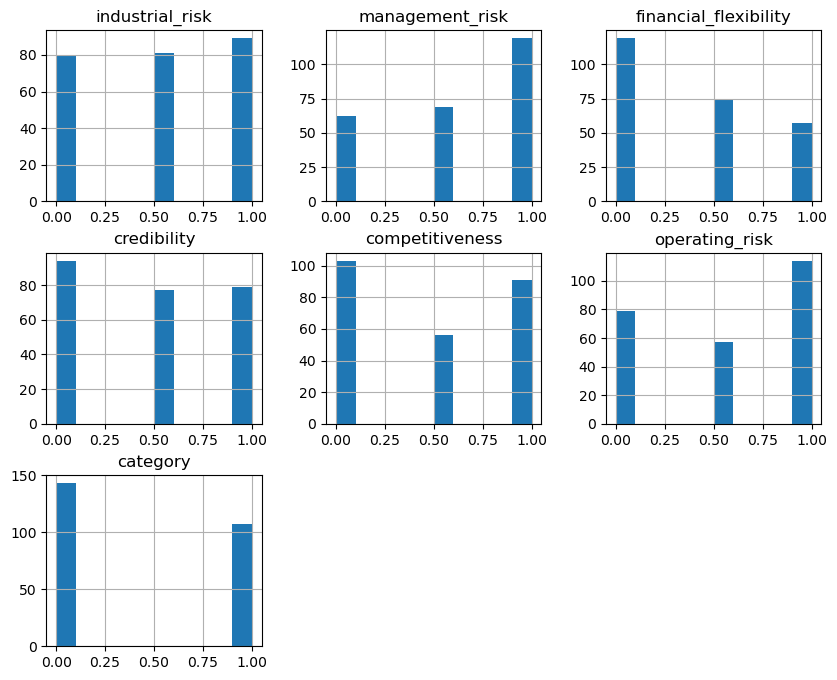

In [17]:
df.hist(figsize=(10,8))
plt.show()

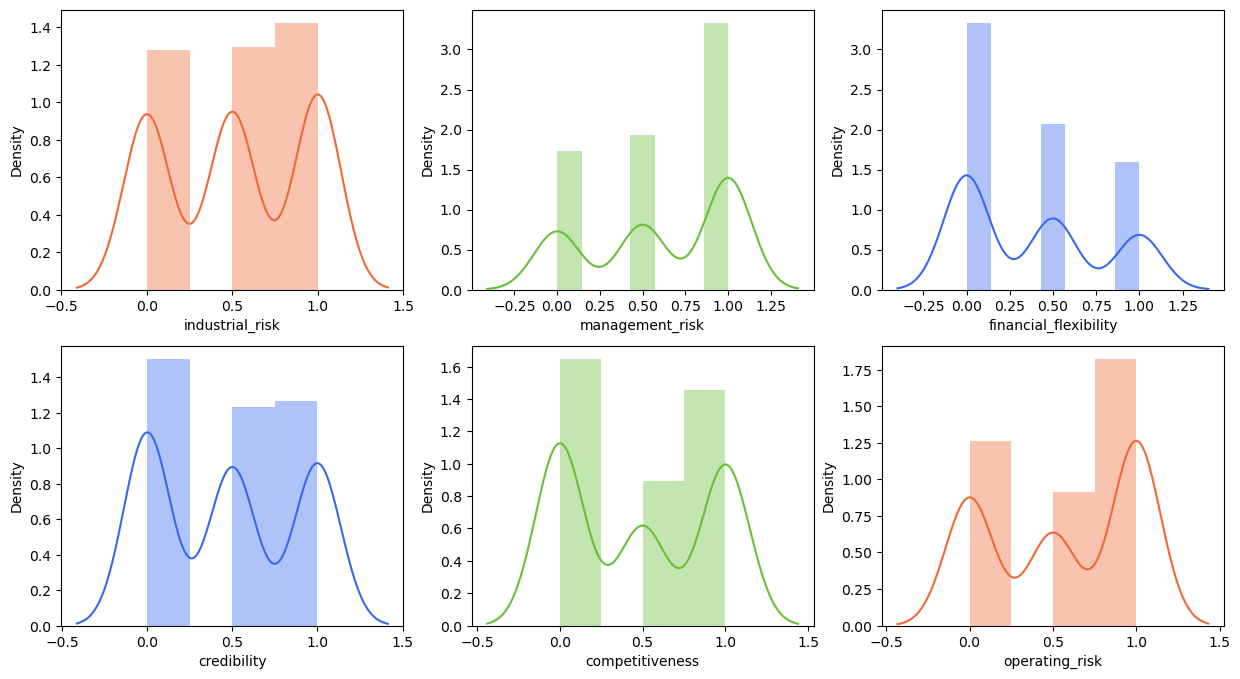

In [18]:
fig, ax = plt.subplots(2,3)
fig.set_size_inches(15,8)

sns.distplot(df.industrial_risk, ax=ax[0,0], color='#ef6937')
sns.distplot(df.management_risk, ax=ax[0,1], color='#69bf37')
sns.distplot(df.financial_flexibility, ax=ax[0,2], color='#3769ef')
sns.distplot(df.credibility, ax=ax[1,0], color='#3769ef')
sns.distplot(df.competitiveness, ax=ax[1,1], color='#69bf37')
sns.distplot(df.operating_risk, ax=ax[1,2], color='#ef6937')

plt.show()


 <ul> 
     <font color='676799> 
         <li> Distributions of all features indicate multi-modal distribution.  </li>
         <li> All features have discrete values which seem to be representative values of categories </li>
         <li> 'management_risk' and 'operating_risk' show slight negative skewness while 'financial_flexibility' shows positive skewness. The rest of the features are more or less zero skewed. </li>
     </font>
 </ul>


<hr/>
<ul>
    <i>
        <font color='#3636a9'>
            <li>All features show multi-modal distributions</li>
            <li>All features have discrete values which is indicative of representation for categorical data.</li>
            <li>While 'management_risk' and 'operating_risk' show slightly negative skewness, 'financial_flexibility' is showing slightly positive skewness. The rest of the features are showing more or less zero skewness. </li>
        </font>
    </i>
</ul>
<hr/>

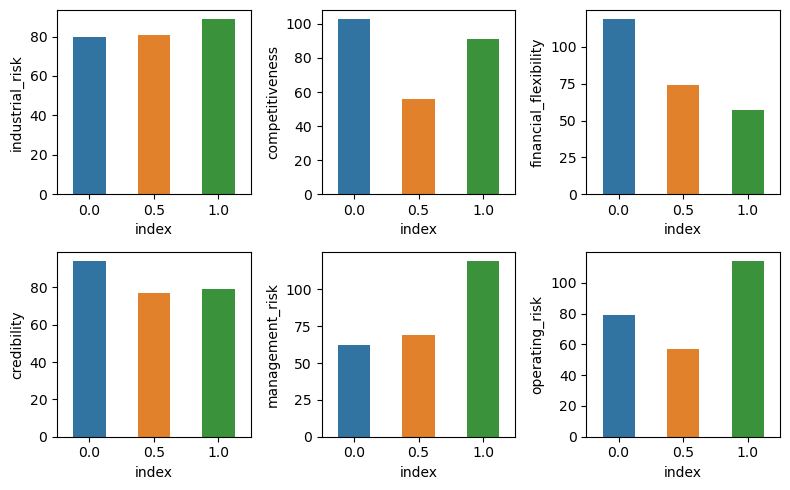

In [19]:
fig, ax = plt.subplots(2,3, figsize=(8,5))

features = ['industrial_risk', 'management_risk', 'financial_flexibility',
        'credibility', 'competitiveness', 'operating_risk']

for i in range(0, len(features)):    
    counts = df[features[i]].value_counts().reset_index()
    sns.barplot(data=counts, x='index', y=features[i], ax=ax[i%2, i%3], width=0.5)

plt.tight_layout()
plt.show()

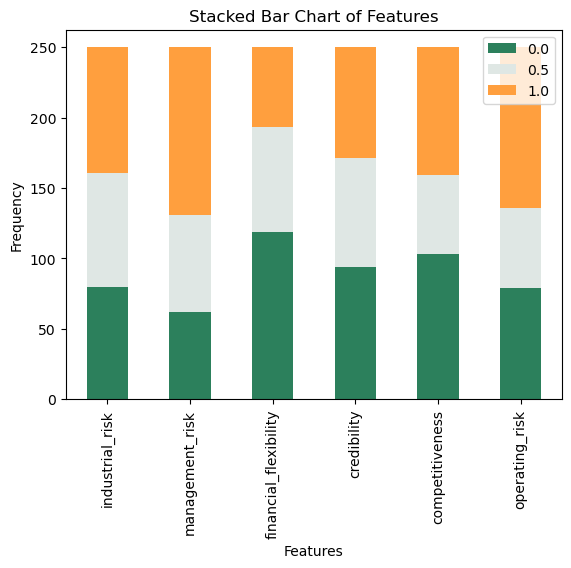

In [20]:
# Calculate frequencies
df_freq = df.iloc[:,:6].apply(lambda x: x.value_counts()).T.fillna(0)

colors = ["#2c805c", "#dfe7e4", "#ff9f3e"]

df_freq.plot(kind='bar', stacked=True, color=colors)
plt.title('Stacked Bar Chart of Features')
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.show()

#### <font color='#1abc9c'> Correlation </font>

In [21]:
corr = df.corr()
corr

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,category
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,-0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,-0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,-0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,0.279786
category,0.227823,0.370838,-0.751020,-0.755909,-0.899452,0.279786,1.000000


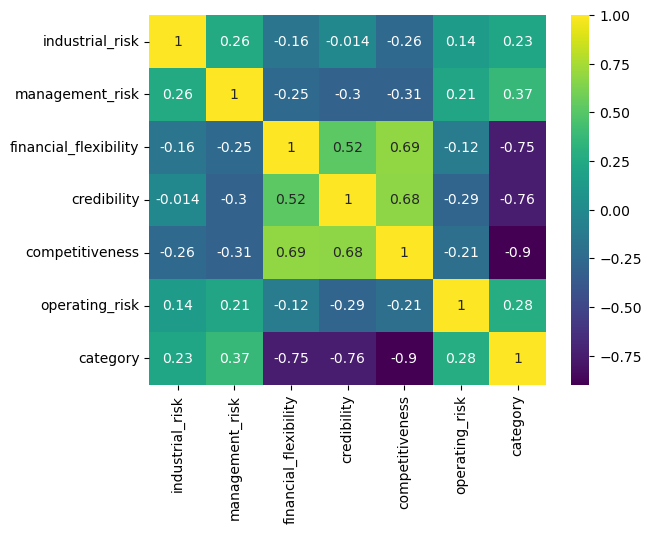

In [22]:
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

<hr/>
<ul>
    <i>
        <font color='#3636a9'>
            <li>There is a moderate positive correlation between 'competitiveness' and 'financial_flexibility' and 'credibility'</li>
            <li>There is a medium positive correlation between 'financial_flexibility' and 'credibility'</li>
            <li>The target 'category' is negatively correlated with 'competitiveness', 'financial_flexibility' and 'credibility'. This means that if a business is rated lower of 'competitiveness', 'financial_flexibility' and 'credibility' there are higher chances of the business going bankrupt. </li>
        </font>
    </i>
</ul>
<hr/>

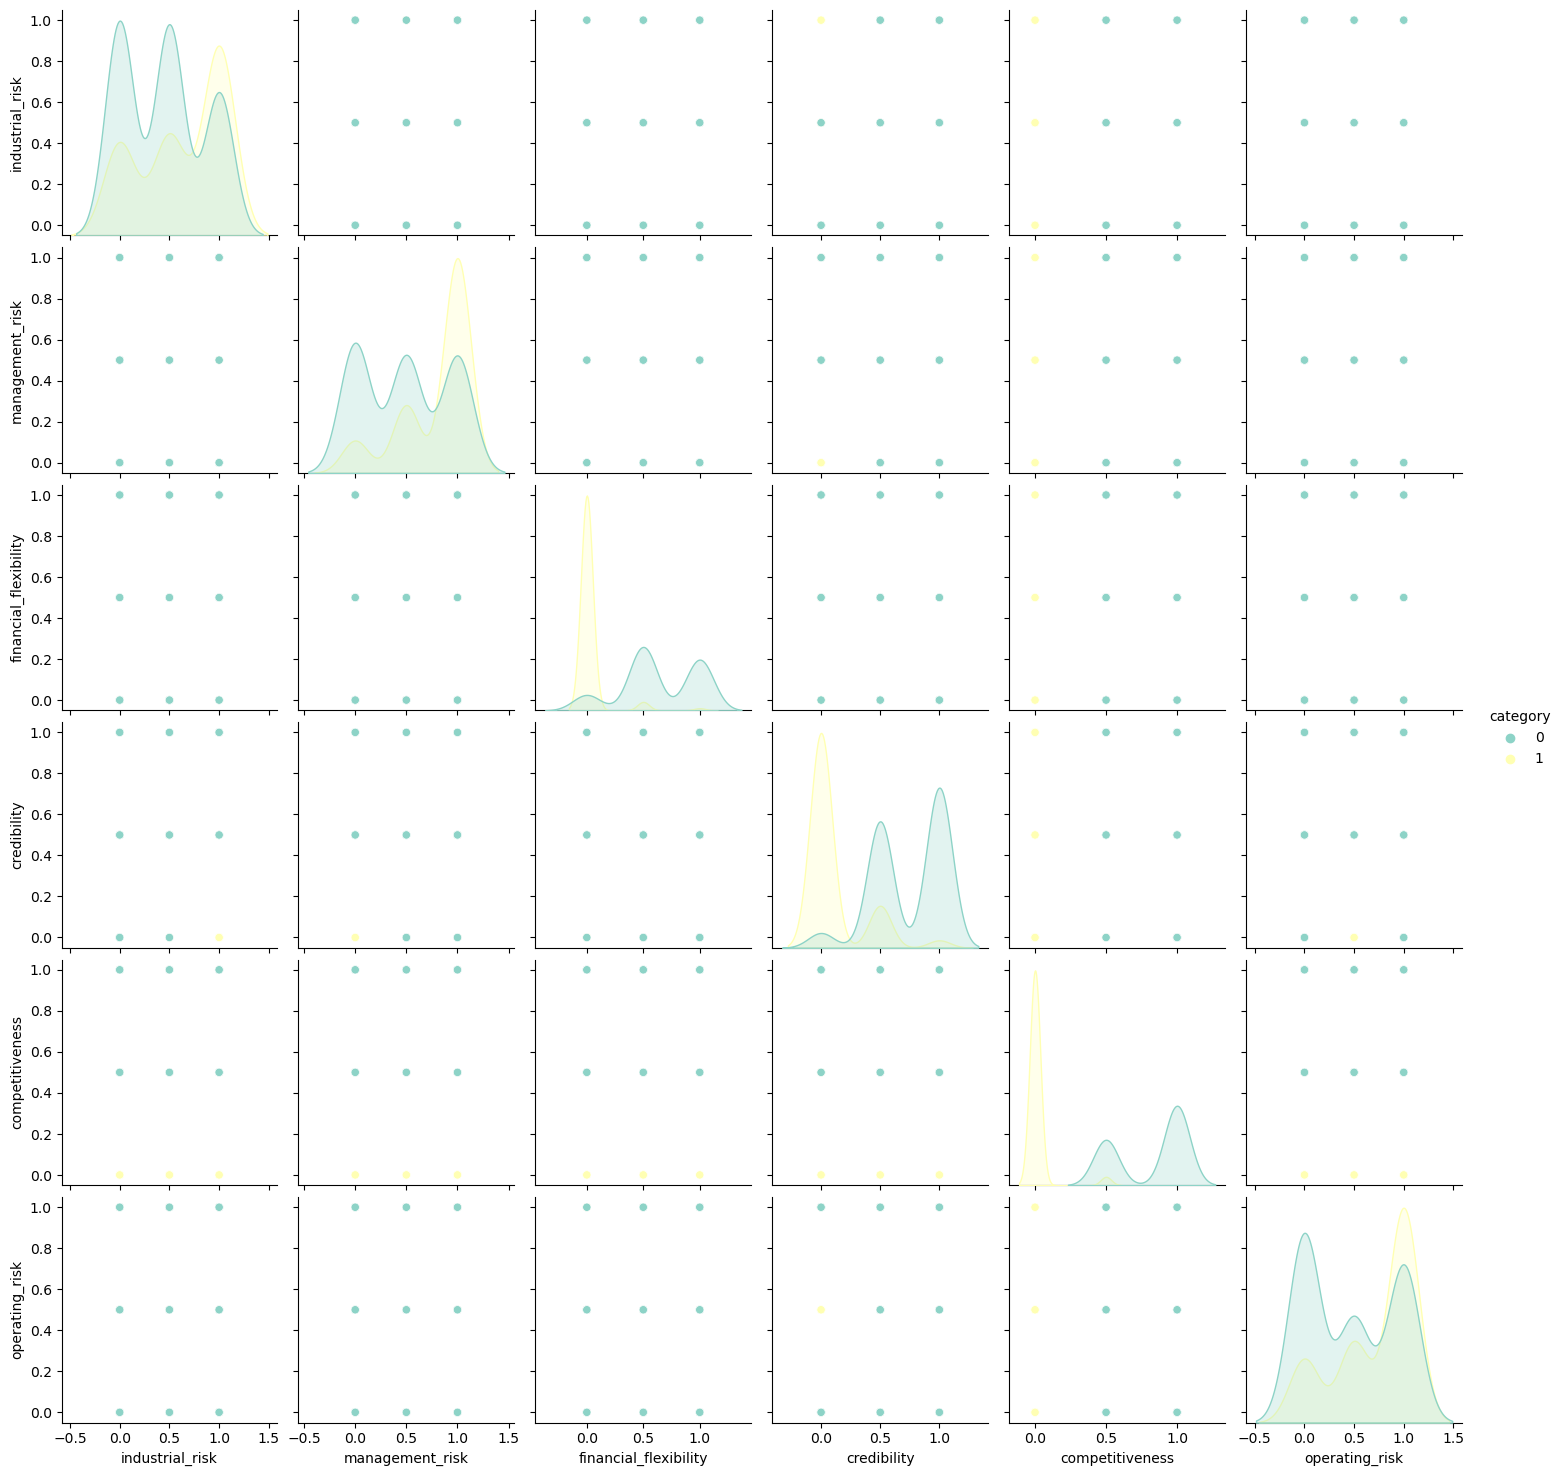

In [23]:
sns.pairplot(data=df, hue='category', palette='Set3')
plt.show()

<hr/>
<ul>
    <i>
        <font color='#676799'> The above pair plots indicate the following:
            <li>Low score on 'competitiveness' invariable leads to the business having a high risk of bankruptcy, regardless of its score on any other features.</li>
            <li>A business has higher risk of bankruptcy with higher score on 'industrial_risk' and lower score on 'credibility'</li>
            <li>So also, a business has a higher risk of going bankrupt when it scores low on both 'management_risk' as well as 'credibility'</li>
        </font>
    </i>
</ul>
<hr/>

#### <font color='#1abc9c'> Determining Outliers </font>

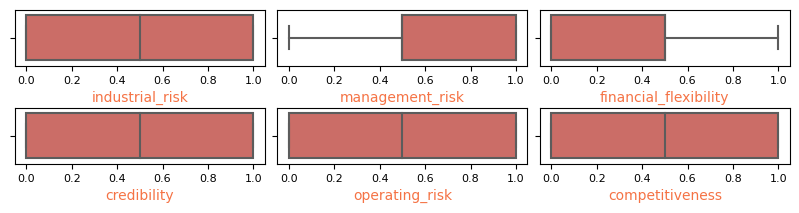

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 2))
fig.subplots_adjust(wspace=0.05, hspace=0.75)

sns.boxplot(x='industrial_risk',data=df,palette='hls',ax=ax[0,0], fliersize=4, flierprops={'marker':'o','markerfacecolor':'c'})
sns.boxplot(x='management_risk',data=df,palette='hls',ax=ax[0,1], fliersize=4, flierprops={'marker':'o','markerfacecolor':'c'})
sns.boxplot(x='financial_flexibility',data=df,palette='hls',ax=ax[0,2], fliersize=4, flierprops={'marker':'o','markerfacecolor':'c'})
sns.boxplot(x='credibility',data=df,palette='hls',ax=ax[1,0], fliersize=4, flierprops={'marker':'o','markerfacecolor':'c'})
sns.boxplot(x='operating_risk',data=df,palette='hls',ax=ax[1,1], fliersize=4, flierprops={'marker':'o','markerfacecolor':'c'})
sns.boxplot(x='competitiveness',data=df,palette='hls',ax=ax[1,2], fliersize=4, flierprops={'marker':'o','markerfacecolor':'c'})

ax[0,0].set_xlabel('industrial_risk', color='#f57345')
ax[0,1].set_xlabel('management_risk', color='#f57345')
ax[0,2].set_xlabel('financial_flexibility', color='#f57345')
ax[1,0].set_xlabel('credibility', color='#f57345')
ax[1,1].set_xlabel('operating_risk', color='#f57345')
ax[1,2].set_xlabel('competitiveness', color='#f57345')

ax[0,0].tick_params(labelsize=8)
ax[0,1].tick_params(labelsize=8)
ax[0,2].tick_params(labelsize=8)
ax[1,0].tick_params(labelsize=8)
ax[1,1].tick_params(labelsize=8)
ax[1,2].tick_params(labelsize=8)

plt.show()

<hr/><font color='#3636a9'> There is no indication of any any outliers in any of the feature values. </font><hr/>

## <font color='#e74c3c'> Data Preparation </font>

### <font color='#1abc9c'> Split dataset into features and target </font>

In [25]:
X = df.iloc[:,:6]
y = df.iloc[:,6:]

print(f'X:\r\n{X.head()}\r\n')
print(f'y:\r\n{y.head()}')

X:
   industrial_risk  management_risk  financial_flexibility  credibility  \
0              0.5              1.0                    0.0          0.0   
1              0.0              1.0                    0.0          0.0   
2              1.0              0.0                    0.0          0.0   
3              0.5              0.0                    0.0          0.5   
4              1.0              1.0                    0.0          0.0   

   competitiveness  operating_risk  
0              0.0             0.5  
1              0.0             1.0  
2              0.0             1.0  
3              0.0             1.0  
4              0.0             1.0  

y:
   category
0         1
1         1
2         1
3         1
4         1


In [26]:
print('X:')
X.info()
print('\r\ny:')
y.info()

X:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
dtypes: float64(6)
memory usage: 11.8 KB

y:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   category  250 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


### <font color='#1abc9c'> Split each dataset into train and test </font>

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(187, 6) (63, 6) (187, 1) (63, 1)


#### <font color='#1abc9c'> Inspect the datasets </font>

In [28]:
print(f'X_train:\r\n{X_train.head()}')
print(f'X_test:\r\n{X_test.head()}\r\n')
print('---------------------\r\n')
print(f'y_train:{y_train.head()}')
print(f'y_test:{y_test.head()}')

X_train:
     industrial_risk  management_risk  financial_flexibility  credibility  \
147              0.5              0.5                    0.5          0.5   
33               0.0              1.0                    0.0          0.0   
240              0.0              1.0                    0.5          0.5   
184              0.5              0.0                    0.5          1.0   
112              0.5              0.5                    1.0          1.0   

     competitiveness  operating_risk  
147              1.0             1.0  
33               0.0             1.0  
240              0.5             0.0  
184              0.5             0.0  
112              1.0             0.5  
X_test:
     industrial_risk  management_risk  financial_flexibility  credibility  \
186              0.5              0.0                    0.0          1.0   
215              0.0              0.0                    0.5          0.5   
47               1.0              1.0                  

## <font color='#e74c3c'> Modelling - Support Vector Machine </font>

### <font color='#1abc9c'> Fit Model </font>

In [29]:
model = SVC(C=0.005, kernel='rbf', gamma=15)
model.fit(X_train, y_train)

SVC(C=0.005, gamma=15)

### <font color='#1abc9c'> Predictions - training data </font>

In [30]:
y_pred_train = model.predict(X_train)

#### <font color='#1abc9c'> Metrics </font>

In [31]:
confusion_matrix(y_train, y_pred_train)

array([[111,   0],
       [ 76,   0]], dtype=int64)

In [32]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       111
           1       0.00      0.00      0.00        76

    accuracy                           0.59       187
   macro avg       0.30      0.50      0.37       187
weighted avg       0.35      0.59      0.44       187



In [33]:
accuracy_score(y_train, y_pred_train)

0.5935828877005348

<hr/>
<ul>
    <i>
        <font color='#676799'> The accuracy score for the first model is fairly low. We will try to improve the model through Hyper-paramter tuning later. For now let us find out how the model performes with test data.
        </font>
    </i>
</ul>
<hr/>

### <font color='#1abc9c'> Predictions - test data </font>

In [34]:
y_pred_test = model.predict(X_test)
print(y_pred_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


#### <font color='#1abc9c'> Metrics </font>

In [35]:
confusion_matrix(y_test, y_pred_test)

array([[32,  0],
       [31,  0]], dtype=int64)

In [36]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.51      1.00      0.67        32
           1       0.00      0.00      0.00        31

    accuracy                           0.51        63
   macro avg       0.25      0.50      0.34        63
weighted avg       0.26      0.51      0.34        63



In [37]:
accuracy_score(y_test, y_pred_test)

0.5079365079365079

<hr/>
<ul>
    <i>
        <font color='#676799'> Based on the initial fit, the model seems to be performing consistently for test data as it has performed for training data. We need to tune the hyper-parameters to further optimize the model. 
        </font>
    </i>
</ul>
<hr/>

## <font color='#e74c3c'> Hyper-Parameter Tuning </font>

## <font color='#1abc9c'> (A) Training data: kernel=['linear'] </font>

In [38]:
kf = KFold(5)
param_grid={
    'kernel':['linear'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Create a hinge loss scorer
hinge_loss_scorer = make_scorer(hinge_loss, greater_is_better=False)

model = SVC()

grid = GridSearchCV(model, param_grid=param_grid, cv=kf, scoring=hinge_loss_scorer, verbose=10)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START C=0.001, kernel=linear......................................
[CV 1/5; 1/6] END ......C=0.001, kernel=linear;, score=-1.000 total time=   0.0s
[CV 2/5; 1/6] START C=0.001, kernel=linear......................................
[CV 2/5; 1/6] END ......C=0.001, kernel=linear;, score=-1.000 total time=   0.0s
[CV 3/5; 1/6] START C=0.001, kernel=linear......................................
[CV 3/5; 1/6] END ......C=0.001, kernel=linear;, score=-1.000 total time=   0.0s
[CV 4/5; 1/6] START C=0.001, kernel=linear......................................
[CV 4/5; 1/6] END ......C=0.001, kernel=linear;, score=-1.000 total time=   0.0s
[CV 5/5; 1/6] START C=0.001, kernel=linear......................................
[CV 5/5; 1/6] END ......C=0.001, kernel=linear;, score=-1.000 total time=   0.0s
[CV 1/5; 2/6] START C=0.01, kernel=linear.......................................
[CV 1/5; 2/6] END .......C=0.01, kernel=linear;, 

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear']},
             scoring=make_scorer(hinge_loss, greater_is_better=False, response_method='predict'),
             verbose=10)

In [39]:
print(f'Best Score: {grid.best_score_}, Best Params: {grid.best_params_}')

Best Score: -0.5988620199146515, Best Params: {'C': 0.1, 'kernel': 'linear'}


## <font color='#1abc9c'> (A) Training data: kernel=['linear'] - Predictions</font>

In [40]:
y_pred_train = grid.predict(X_train)

#### <font color='#1abc9c'> Metrics </font>

In [41]:
confusion_matrix(y_train, y_pred_train)

array([[111,   0],
       [  1,  75]], dtype=int64)

In [42]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       111
           1       1.00      0.99      0.99        76

    accuracy                           0.99       187
   macro avg       1.00      0.99      0.99       187
weighted avg       0.99      0.99      0.99       187



In [43]:
accuracy_score(y_train, y_pred_train)

0.9946524064171123

## <font color='#1abc9c'> (A) Testing data: kernel=['linear'] - Predictions</font>

In [44]:
y_pred_test = grid.predict(X_test)

#### <font color='#1abc9c'> Metrics </font>

In [45]:
confusion_matrix(y_test, y_pred_test)

array([[32,  0],
       [ 0, 31]], dtype=int64)

In [46]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        31

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [47]:
accuracy_score(y_test, y_pred_test)

1.0

## <font color='#1abc9c'> (B) Training data: kernel=['rbf', 'sigmoid'] </font>

In [48]:
kf = KFold(5)
param_grid={
    'kernel':['rbf', 'sigmoid'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [5,10,15,20,25]
}
# Create a hinge loss scorer
hinge_loss_scorer = make_scorer(hinge_loss, greater_is_better=False)

model = SVC()

grid = GridSearchCV(model, param_grid=param_grid, cv=kf, scoring=hinge_loss_scorer, verbose=10)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5; 1/60] START C=0.001, gamma=5, kernel=rbf...............................
[CV 1/5; 1/60] END C=0.001, gamma=5, kernel=rbf;, score=-1.000 total time=   0.0s
[CV 2/5; 1/60] START C=0.001, gamma=5, kernel=rbf...............................
[CV 2/5; 1/60] END C=0.001, gamma=5, kernel=rbf;, score=-1.000 total time=   0.0s
[CV 3/5; 1/60] START C=0.001, gamma=5, kernel=rbf...............................
[CV 3/5; 1/60] END C=0.001, gamma=5, kernel=rbf;, score=-1.000 total time=   0.0s
[CV 4/5; 1/60] START C=0.001, gamma=5, kernel=rbf...............................
[CV 4/5; 1/60] END C=0.001, gamma=5, kernel=rbf;, score=-1.000 total time=   0.0s
[CV 5/5; 1/60] START C=0.001, gamma=5, kernel=rbf...............................
[CV 5/5; 1/60] END C=0.001, gamma=5, kernel=rbf;, score=-1.000 total time=   0.0s
[CV 1/5; 2/60] START C=0.001, gamma=5, kernel=sigmoid...........................
[CV 1/5; 2/60] END C=0.001, gamma=5, kerne

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [5, 10, 15, 20, 25],
                         'kernel': ['rbf', 'sigmoid']},
             scoring=make_scorer(hinge_loss, greater_is_better=False, response_method='predict'),
             verbose=10)

In [49]:
print(f'Best Score: {grid.best_score_}, Best Params: {grid.best_params_}')

Best Score: -0.620199146514936, Best Params: {'C': 1, 'gamma': 5, 'kernel': 'rbf'}


## <font color='#1abc9c'> (B) Training data: kernel=['rbf', 'sigmoid'] - Predictions</font>

In [50]:
y_pred_train = grid.predict(X_train)

#### <font color='#1abc9c'> Metrics </font>

In [51]:
confusion_matrix(y_train, y_pred_train)

array([[111,   0],
       [  0,  76]], dtype=int64)

In [52]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00        76

    accuracy                           1.00       187
   macro avg       1.00      1.00      1.00       187
weighted avg       1.00      1.00      1.00       187



In [53]:
accuracy_score(y_train, y_pred_train)

1.0

## <font color='#1abc9c'> (B) Testing data: kernel=['rbf', 'sigmoid'] - Predictions</font>

In [54]:
y_pred_test = grid.predict(X_test)

In [55]:
confusion_matrix(y_test, y_pred_test)

array([[32,  0],
       [ 2, 29]], dtype=int64)

In [56]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       1.00      0.94      0.97        31

    accuracy                           0.97        63
   macro avg       0.97      0.97      0.97        63
weighted avg       0.97      0.97      0.97        63



In [57]:
accuracy_score(y_test, y_pred_test)

0.9682539682539683

## <font color='#1abc9c'> (C) Training data: kernel=['poly'] </font>

In [58]:
kf = KFold(3)
param_grid={
    'kernel':['poly'],
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [5,10,15,20,25],
    'degree': [2,3,4,5]
}

# Create a hinge loss scorer
hinge_loss_scorer = make_scorer(hinge_loss, greater_is_better=False)

model = SVC()

grid = GridSearchCV(model, param_grid=param_grid, cv=kf, scoring=hinge_loss_scorer, verbose=10)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3; 1/100] START C=0.01, degree=2, gamma=5, kernel=poly....................
[CV 1/3; 1/100] END C=0.01, degree=2, gamma=5, kernel=poly;, score=-0.619 total time=   0.0s
[CV 2/3; 1/100] START C=0.01, degree=2, gamma=5, kernel=poly....................
[CV 2/3; 1/100] END C=0.01, degree=2, gamma=5, kernel=poly;, score=-0.565 total time=   0.0s
[CV 3/3; 1/100] START C=0.01, degree=2, gamma=5, kernel=poly....................
[CV 3/3; 1/100] END C=0.01, degree=2, gamma=5, kernel=poly;, score=-0.613 total time=   0.0s
[CV 1/3; 2/100] START C=0.01, degree=2, gamma=10, kernel=poly...................
[CV 1/3; 2/100] END C=0.01, degree=2, gamma=10, kernel=poly;, score=-0.619 total time=   0.0s
[CV 2/3; 2/100] START C=0.01, degree=2, gamma=10, kernel=poly...................
[CV 2/3; 2/100] END C=0.01, degree=2, gamma=10, kernel=poly;, score=-0.565 total time=   0.0s
[CV 3/3; 2/100] START C=0.01, degree=2, gamma=10, kernel=poly....

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [2, 3, 4, 5],
                         'gamma': [5, 10, 15, 20, 25], 'kernel': ['poly']},
             scoring=make_scorer(hinge_loss, greater_is_better=False, response_method='predict'),
             verbose=10)

In [59]:
print(f'Best Score: {grid.best_score_}, Best Params: {grid.best_params_}')

Best Score: -0.5988223246287762, Best Params: {'C': 0.01, 'degree': 2, 'gamma': 5, 'kernel': 'poly'}


## <font color='#1abc9c'> (C) Training data: kernel=['poly'] - Predictions</font>

In [60]:
y_pred_train = grid.predict(X_train)

In [61]:
confusion_matrix(y_train, y_pred_train)

array([[111,   0],
       [  1,  75]], dtype=int64)

In [62]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       111
           1       1.00      0.99      0.99        76

    accuracy                           0.99       187
   macro avg       1.00      0.99      0.99       187
weighted avg       0.99      0.99      0.99       187



In [63]:
accuracy_score(y_train, y_pred_train)

0.9946524064171123

## <font color='#1abc9c'> (C) Testing data: kernel=['poly'] - Predictions</font>

In [64]:
y_pred_test = grid.predict(X_test)

In [65]:
confusion_matrix(y_test, y_pred_test)

array([[32,  0],
       [ 0, 31]], dtype=int64)

In [66]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        31

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [67]:
accuracy_score(y_test, y_pred_test)

1.0

<hr/>
<ul>
    <i>
        <font color='#676799'> Based on the accuracy scores for training and testing data we accept the following Hyper-Parameters as optimum.
            <br/><b>Best Params: Best Params: {'C': 0.01, 'degree': 2, 'gamma': 5, 'kernel': 'poly'} </b>
        </font>
    </i>
</ul>
<hr/>

## <font color='#e74c3c'> Tuned Model </font>

In [68]:
# Start the timer
start_time = t.time()

model = SVC(C=0.01, degree=2, gamma=5, kernel='poly', probability=True)
model.fit(X_train, y_train)

# End the timer
end_time = t.time()

elapsed_time = end_time - start_time
print(f"Elapsed time for fitting: {elapsed_time:0.5f} seconds")

Elapsed time for fitting: 0.00700 seconds


### <font color='#1abc9c'> Predictions - training data </font>

In [69]:
# Start the timer
start_time = t.time()

y_pred_train = model.predict(X_train)

# End the timer
end_time = t.time()

elapsed_time = end_time - start_time
print(f"Elapsed time for predictions: {elapsed_time:0.5f} seconds")

y_pred_train

Elapsed time for predictions: 0.00300 seconds


array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

#### <font color='#1abc9c'> Metrics </font>

In [70]:
confusion_matrix(y_train, y_pred_train)

array([[111,   0],
       [  1,  75]], dtype=int64)

In [71]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       111
           1       1.00      0.99      0.99        76

    accuracy                           0.99       187
   macro avg       1.00      0.99      0.99       187
weighted avg       0.99      0.99      0.99       187



In [72]:
accuracy_score(y_train, y_pred_train)

0.9946524064171123

### <font color='#1abc9c'> Predictions - testing data </font>

In [73]:
# Start the timer
start_time = t.time()

y_pred_test = model.predict(X_test)

# End the timer
end_time = t.time()

elapsed_time = end_time - start_time
print(f"Elapsed time for predictions: {elapsed_time:0.5f} seconds")

y_pred_test

Elapsed time for predictions: 0.00400 seconds


array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1],
      dtype=int64)

#### <font color='#1abc9c'> Metrics </font>

In [74]:
confusion_matrix(y_test, y_pred_test)

array([[32,  0],
       [ 0, 31]], dtype=int64)

In [75]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        31

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



## <font color='#e74c3c'> Decision Metrics </font>

### <font color='#1abc9c'> Precision, Recall, F1 and Accuracy </font>

In [76]:
print(f'The precision score is: {precision_score(y_test, y_pred_test)}')
print(f'The recall score is: {recall_score(y_test, y_pred_test)}')
print(f'The f1 score is: {f1_score(y_test, y_pred_test)}')
print(f'The accuracy score is: {accuracy_score(y_test, y_pred_test)}')

The precision score is: 1.0
The recall score is: 1.0
The f1 score is: 1.0
The accuracy score is: 1.0


### <font color='#1abc9c'> ROC Curve and AUC </font>

In [77]:
print(f'The roc_auc score is: {roc_auc_score(y_test, y_pred_test)}')

The roc_auc score is: 1.0


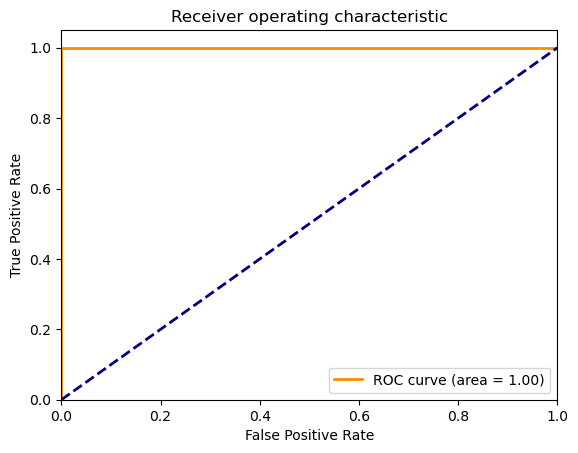

In [78]:
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## <font color='#e74c3c'> Evaluation Metrics </font>

## <font color='#1abc9c'> Brier Score </font>

In [79]:
# Brier Score closer to 0 is better
brier_score = brier_score_loss(y_test, y_pred_test)
print(f"The Brier score is {brier_score:.4f}")

The Brier score is 0.0000


## <font color='#1abc9c'> Log-Loss Score </font>

In [80]:
lls = log_loss(y_test, y_pred_test)
print(f'The log loss score is {lls:0.4f}')

The log loss score is 0.0000


## <font color='#1abc9c'> Matthews Correlation Coefficient (MCC) </font>

In [81]:
# MCC=1: Perfect prediction.
# MCC=0: No better than random.
# MCC=−1: Total disagreement between prediction and observation.
mcc = matthews_corrcoef(y_test, y_pred_test)
print(f'The Matthews Correlation Coefficient is {mcc:0.4f}')

The Matthews Correlation Coefficient is 1.0000
